In [ ]:
# import the necessary packages
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Method 1 - Mean Squared Error

In [ ]:
def mse(imageA, imageB):
    	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

## Method 2 - Structural Similarity Measure

In [ ]:
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = ssim(imageA, imageB)
	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
	# show the images
	plt.show()

In [ ]:
# load the images -- the original, the original + contrast,
# and the original + photoshop
test1 = cv2.imread("images/0.png")
test2 = cv2.imread("images/0_0.png")

# convert the images to grayscale
test1 = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)
test2 = cv2.cvtColor(test2, cv2.COLOR_BGR2GRAY)

In [ ]:
dim = (300,50)
test1 = cv2.resize(test1, dim, interpolation = cv2.INTER_AREA)
test2 = cv2.resize(test2, dim, interpolation = cv2.INTER_AREA)

In [ ]:
# initialize the figure
fig = plt.figure("Images")
images = ("Test1", test1), ("Test2", test2)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
# show the figure
plt.show()
# compare the images
compare_images(test1, test2, "test1 vs. test2")

## Method 3 - Pillow

In [1]:
from PIL import Image, ImageChops, ImageStat

In [22]:
img1 = Image.open("images/4.png").convert('L')
img2 = Image.open("images/4_4.png").convert('L')

In [23]:
dim = (300,50)
img1 = img1.resize(dim)
img2 = img2.resize(dim)

In [26]:
diff = ImageChops.difference(img1, img2)
diff.show()

In [27]:
# Calculate difference as a ratio.
stat = ImageStat.Stat(diff)
diff_ratio = sum(stat.mean) / (len(stat.mean) * 255)

diff_ratio * 100 

0.0

## Method 4 - Image Hash

### Cryptographic hash function

In [29]:
import os
from PIL import Image
from PIL import ImageFile
import imagehash

In [30]:
#through picturu hash to compare
def get_hash_dict(path):
    hash_dict = {}
    image_quantity = 0
    with open(path, 'rb') as fp:
        hash_dict[path] = imagehash.average_hash(Image.open(fp))
        image_quantity += 1

    return hash_dict, image_quantity

In [34]:
def compare_image_with_hash(image_file_name_1, image_file_name_2, max_dif=0):
    """
    max_dif: The maximum hash difference is allowed, the smaller and more accurate, the minimum is 0.
    recommend to use
    """
    ImageFile.LOAD_TRUNCATED_IMAGES = True
    hash_1 = None
    hash_2 = None
    with open(image_file_name_1, 'rb') as fp:
        hash_1 = imagehash.average_hash(Image.open(fp))
    with open(image_file_name_2, 'rb') as fp:
        hash_2 = imagehash.average_hash(Image.open(fp))
    dif = hash_1 - hash_2
    return dif


In [42]:
compare_image_with_hash('images/5.png', 'images/5_5.png', max_dif=0)

10

## Method 5 - Image Histogram Analysis

In [49]:
import cv2
from matplotlib import pyplot as plt

In [46]:
# load the images -- the original, the original + contrast,
# and the original + photoshop
test1 = cv2.imread("images/0.png")
test2 = cv2.imread("images/0_0.png")

# convert the images to grayscale
test1 = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)
test2 = cv2.cvtColor(test2, cv2.COLOR_BGR2GRAY)

dim = (300,50)
test1 = cv2.resize(test1, dim, interpolation = cv2.INTER_AREA)
test2 = cv2.resize(test2, dim, interpolation = cv2.INTER_AREA)

In [51]:
histr = cv2.calcHist([test2],[0],None,[256],[0,256])

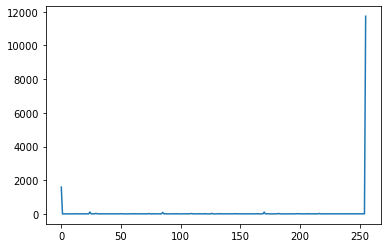

In [52]:
plt.plot(histr)
plt.show()